In [94]:
from __future__ import division
from __future__ import print_function

import argparse
import time

import numpy as np
import scipy.sparse as sp
import torch
import torchvision
from torch import optim
import pandas as pd


from gae.model import GCNModelVAE

from gae.optimizer import loss_function
from gae.utils import load_data, mask_test_edges, preprocess_graph, get_roc_score

import import_ipynb
from gaemain import gae_for

from scipy.stats.stats import pearsonr  
from scipy import spatial

C:\Users\RAAVAN RAY\AppData\Local\Temp\ipykernel_13460\207423313.py:23: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


edges_mediapipe= 2556 1278.0
Optimization Finished!


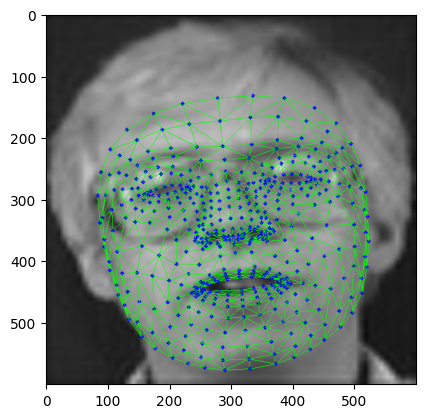

In [95]:
image_path="./orl_dataset/person2/test_image/11_2.jpg"
Z=gae_for(image_path)

In [96]:
print(type(Z))
Z=Z.detach().numpy()
print(Z.shape)
tdata=Z

<class 'torch.Tensor'>
(468, 16)


In [97]:

path="./orl_dataset/person1/latent_representation/testfile1.csv"
Z1 = np.loadtxt(path, delimiter=',')
# Z1=torch.from_numpy(array)
Z1=Z1[1:]
# print(Z1[0])
sign=Z1


In [98]:
# from sklearn.metrics.pairwise import cosine_similarity
# def get_cosine_similarity(feature_vec_1, feature_vec_2):    
#     return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]
# print(get_cosine_similarity(Z,Z1))    

In [109]:
# dist=[]
# c_dist=[]
# for i in range(468):
#     dist.append(np.linalg.norm(Z[i]- Z1[i]))
#     c_dist.append(pearsonr(np.array(Z[i]).flatten() ,np.array(Z1[i]).flatten())[0])
# # print(dist)
# min_ind=dist.index(min(dist))
# max_ind=c_dist.index(max(c_dist))
# print(min_ind,max_ind)

72 467


In [ ]:
#Results of extended yale

import numpy as np
from scipy.stats.stats import pearsonr  
import glob
import os
from scipy import spatial
from sklearn.metrics import confusion_matrix
import pandas as pd
import dataframe_image as dfi

acc=[]
avg_p=[]
avg_recall=[]
avg_fScore=[]
betaSquare=0.5*0.5
r_rate=0 #recognition rate
pr_rate=0 #recognition rate
cs_rate=0 
acc=[]

files = glob.glob('/content/drive/MyDrive/finalonewithalloutput_sanjog/gae/data/output_extended/output/signature/*.csv', 
                   recursive = True)
sign=[None]*6
for file in files:
  name=file.split('/')[10]
  ind=int(int(name.split('B')[1].split('_')[0])-11)
  sign[ind]=np.loadtxt(file,delimiter=',')
  # tname=name.split('_')
  # rname=tname[0]+'_'+tname[1]+'.jpg'
  # os.rename(name,rname)

In [108]:
#distance of nuetral faces with few problem

import numpy as np
import glob
import os
# tp='tp'
# tn='tn'
# fp='fp'
# fn='fn'
acc=[]
avg_p=[]
avg_recall=[]
avg_fScore=[]
betaSquare=0.5*0.5
r_rate=0 #recognition rate
# files = glob.glob('/content/drive/MyDrive/finalonewithalloutput_sanjog/gae/data/output_neutral_with_problems/signature/*.csv', 
#                    recursive = True)
files = ['./orl_dataset/person1/latent_representation/testfile1.csv','./orl_dataset/person1/latent_representation/testfile2.csv','./orl_dataset/person1/latent_representation/testfile3.csv']
print(files)

sign=[None]*15
print(sign)
# for file in files:
#   name=file.split('/')[3]
#   ind=int(name.split('_')[0].split('t')[1])-1
#   sign[ind]=np.loadtxt(file,delimiter=',')
#   # tname=name.split('_')
#   # rname=tname[0]+'_'+tname[1]+'.jpg'
#   # os.rename(name,rname)

files = Z
data = []

test=[]
filename=[]
filename.append('./orl_dataset/person1/latent_representation/testfile1.csv')
filename.append('./orl_dataset/person1/latent_representation/testfile2.csv')
filename.append('./orl_dataset/person1/latent_representation/testfile3.csv.csv')
i=0
# print("files",len(files))
for file in files:
  TP=0
  TN=0
  FP=0
  FN=0
  # filename=file.split('/')[3]
  ind=i
  i=i+1
  tdata = np.loadtxt(file,delimiter=',')
  dist=[]
  for ele in sign:
    dist.append(np.linalg.norm(tdata - ele))
  mind=dist.index(min(dist))

  print(filename,ind,mind)
  if(ind != mind):
    print("\t\t\t\tthis is wrong",ind,mind)
    TP=0
    TN=13
    FP=1
    FP=1
  elif(ind == mind):
    r_rate+=1
    TP=1
    TN=14
    FN=0
    FP=0
  #Measures

  Accuracy = (TP + TN )/ (TP + TN + FP + FN) #(all correct / all)
  Misclassification = (FP + FN )/ (TP + TN + FP + FN) #(all incorrect / all)
  Precision  = TP / (TP + FP) #(true positives / predicted positives)
  deno=TP+FP
  Sensitivity   = TP / (deno) #aka Recall (true positives / all actual positives)
  Specificity  =TN / (TN + FP) #(true negatives / all actual negatives)
  F1_deno=(Precision+Sensitivity)
  if(F1_deno==0):
    F1_Score=0
  else:
    F1_Score=(1+betaSquare)*((Precision*Sensitivity)/(betaSquare*F1_deno))
  print("\nAccuracy: {}\nMisclassification: {}\nPrecision: {}\nSensitivity: {}\nSpecificity: {}\nF1_Score: {}\n".format(Accuracy,Misclassification,Precision,Sensitivity,Specificity,F1_Score))
  acc.append(Accuracy)
  avg_p.append(Precision)
  avg_recall.append(Sensitivity)
  avg_fScore.append(F1_Score)
print(r_rate)
print("Total Test Case: {}\nAverage Accuracy: {}\nRecognition Rate: {}\nAverage Precision: {}\nAverage Recall: {}\nAverage F0.5 Score: {}".format(len(acc),(sum(acc)/len(acc)),r_rate/len(acc),(sum(avg_p)/len(avg_p)),(sum(avg_recall)/len(avg_recall)),(sum(avg_fScore)/len(avg_fScore))))



['./orl_dataset/person1/latent_representation/testfile1.csv', './orl_dataset/person1/latent_representation/testfile2.csv', './orl_dataset/person1/latent_representation/testfile3.csv']
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
files 468


TypeError: non-string returned while reading data